In [10]:
import sys
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.dataset_loader import CoastData
from src.data_processing.patchify import Patchify
from src.data_processing.patch_reconstructor import PatchReconstructor

## Load data

In [2]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed/"))

# Load the data, all the different stations
data = CoastData(data_path, name="global") # arenaldentem

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image = filtered_data['train']['images'][0]
mask = filtered_data['train']['masks'][0]

print("Path:", image)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Path: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed/images/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.image.jpg


In [3]:
patchify = Patchify(patch_size=256, stride=128)

result = patchify.extract_patches(image, mask, skip_background=False, skip_no_shoreline=False)
patches = result['patches']

In [4]:
print("Number of patches:", len(patches))

Number of patches: 15


Rows: 2


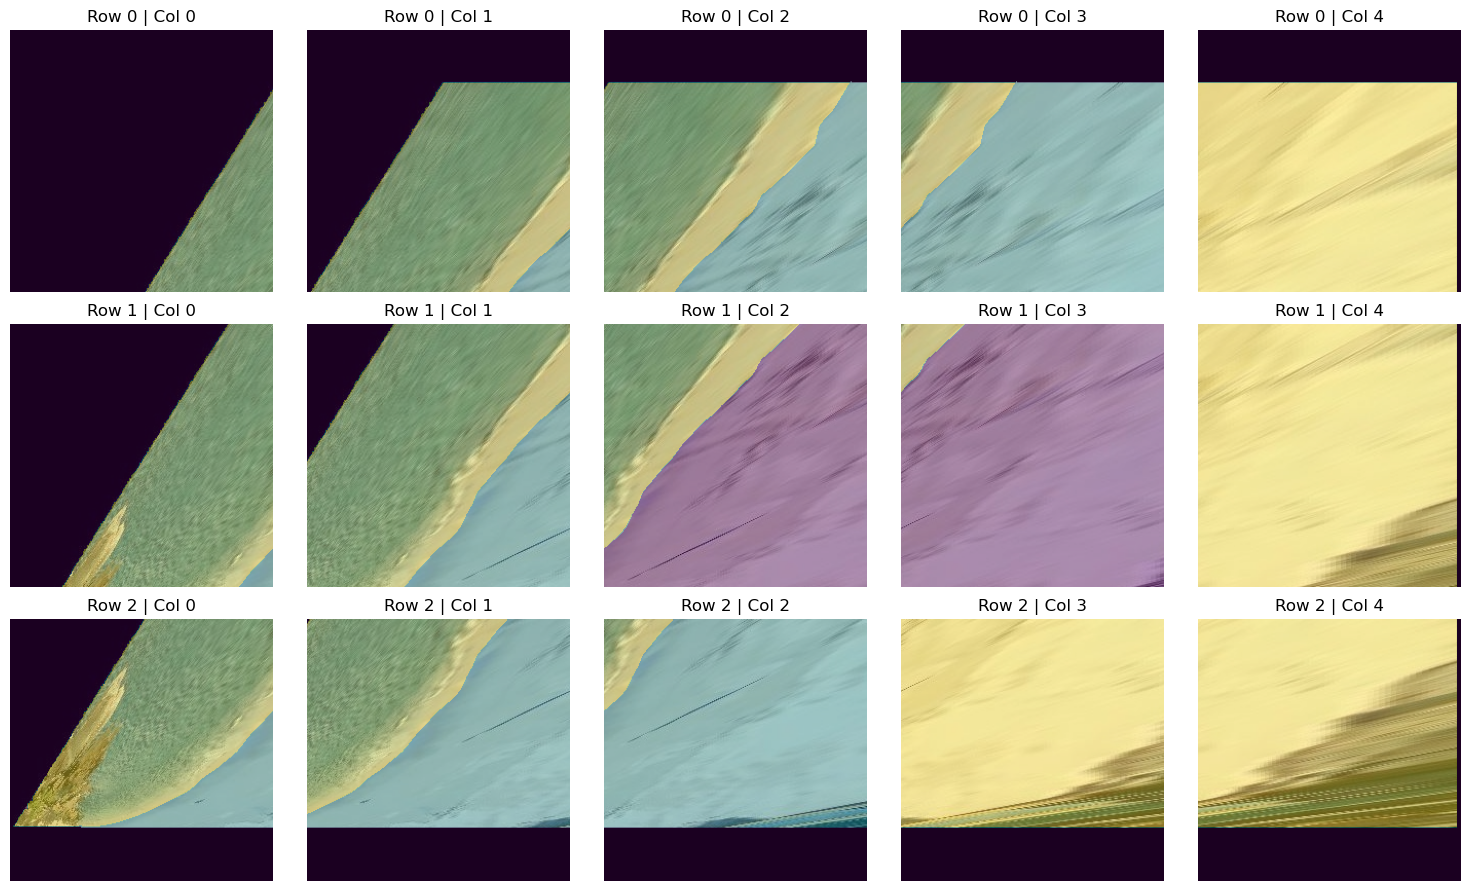

In [5]:
rows = max(patch['row'] for patch in patches)
cols = max(patch['col'] for patch in patches)
print("Rows:", rows)

# Create subplots
fig, axes = plt.subplots(rows + 1, cols + 1, figsize=(3*(cols + 1), 3 * (rows + 1)))
axes = axes.flatten()

# Show each patch
for i, patch in enumerate(patches):
    ax = axes[patch['row'] * (cols + 1) + patch['col']]
    patch['image'] = cv2.cvtColor(patch['image'], cv2.COLOR_BGR2RGB)
    ax.imshow(patch['image'])
    ax.imshow(patch['mask'], alpha=0.4)
    ax.set_title(f"Row {patch['row']} | Col {patch['col']}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [17]:
extract_patches_and_save = patchify.extract_patches_and_save(filtered_data, output_dir='../../data/patchify/')

Extracting patches for train dataset...
Finished extracting patches for train dataset.

Extracting patches for validation dataset...
Finished extracting patches for validation dataset.

Extracting patches for test dataset...
Finished extracting patches for test dataset.



### Padding with mirror padding

Try to avoid adding background by using the mirrored version of the image for padding

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Rows: 2


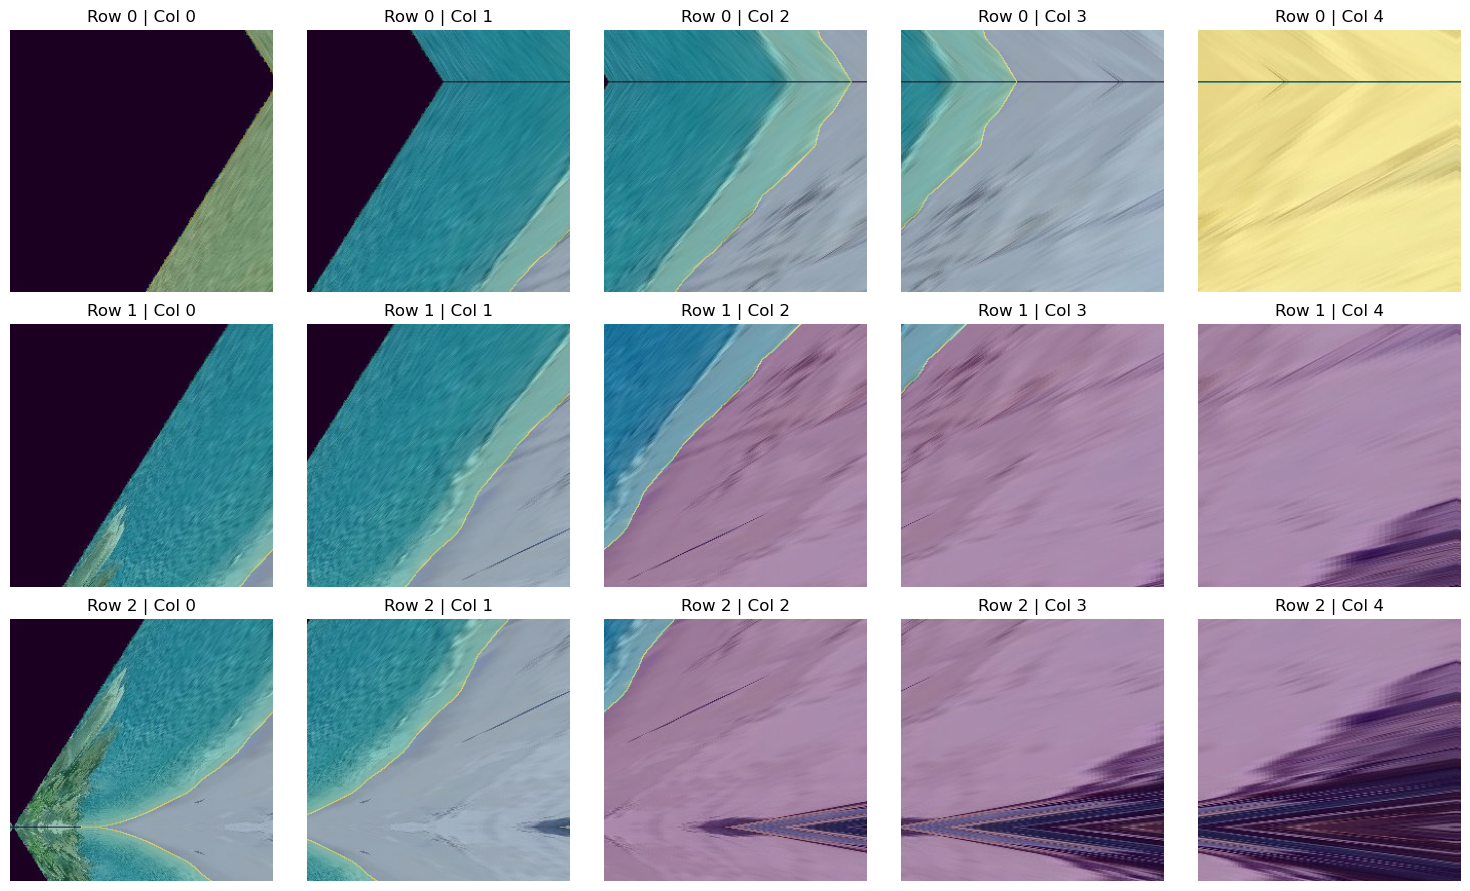

In [ ]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_4_classes/"))

# Load the data, all the different stations
data = CoastData(data_path)

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

image = filtered_data['train']['images'][0]
mask = filtered_data['train']['masks'][0]

patchify = Patchify(patch_size=256, stride=128)

result = patchify.extract_patches(image, mask, skip_background=False, padding_mode='reflect')
patches = result['patches']

rows = max(patch['row'] for patch in patches)
cols = max(patch['col'] for patch in patches)
print("Rows:", rows)

# Create subplots
fig, axes = plt.subplots(rows + 1, cols + 1, figsize=(3*(cols + 1), 3 * (rows + 1)))
axes = axes.flatten()

# Show each patch
for i, patch in enumerate(patches):
    ax = axes[patch['row'] * (cols + 1) + patch['col']]
    patch['image'] = cv2.cvtColor(patch['image'], cv2.COLOR_BGR2RGB)
    ax.imshow(patch['image'])
    ax.imshow(patch['mask'], alpha=0.4)
    ax.set_title(f"Row {patch['row']} | Col {patch['col']}")
    ax.axis('off')

for i in range(0, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
extract_patches_and_save = patchify.extract_patches_and_save(filtered_data, output_dir='../../data/patchify_reflect/', padding_mode='reflect')

Extracting patches for train dataset...
Finished extracting patches for train dataset.

Extracting patches for validation dataset...
Finished extracting patches for validation dataset.

Extracting patches for test dataset...
Finished extracting patches for test dataset.



## Only shoreline on the patches


In [3]:
# Only shoreline on the patches
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_shoreline/"))

# Load the data, all the different stations
data = CoastData(data_path)

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image_path = filtered_data['train']['images'][0]
mask_path = filtered_data['train']['masks'][0]

print("Path:", image_path)

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Path: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_shoreline/images/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.image.jpg


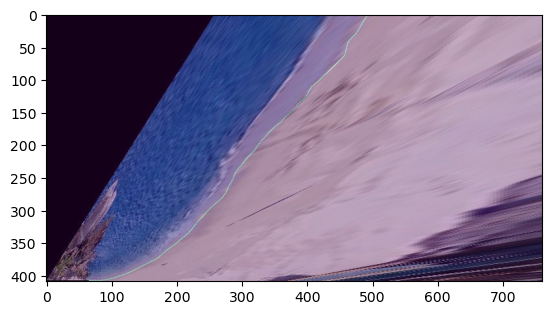

[0 1]


In [17]:
img = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
# plt.show()

plt.imshow(mask, alpha=0.3)
plt.show()

print(np.unique(mask))


Number of patches: 10
Rows: 2


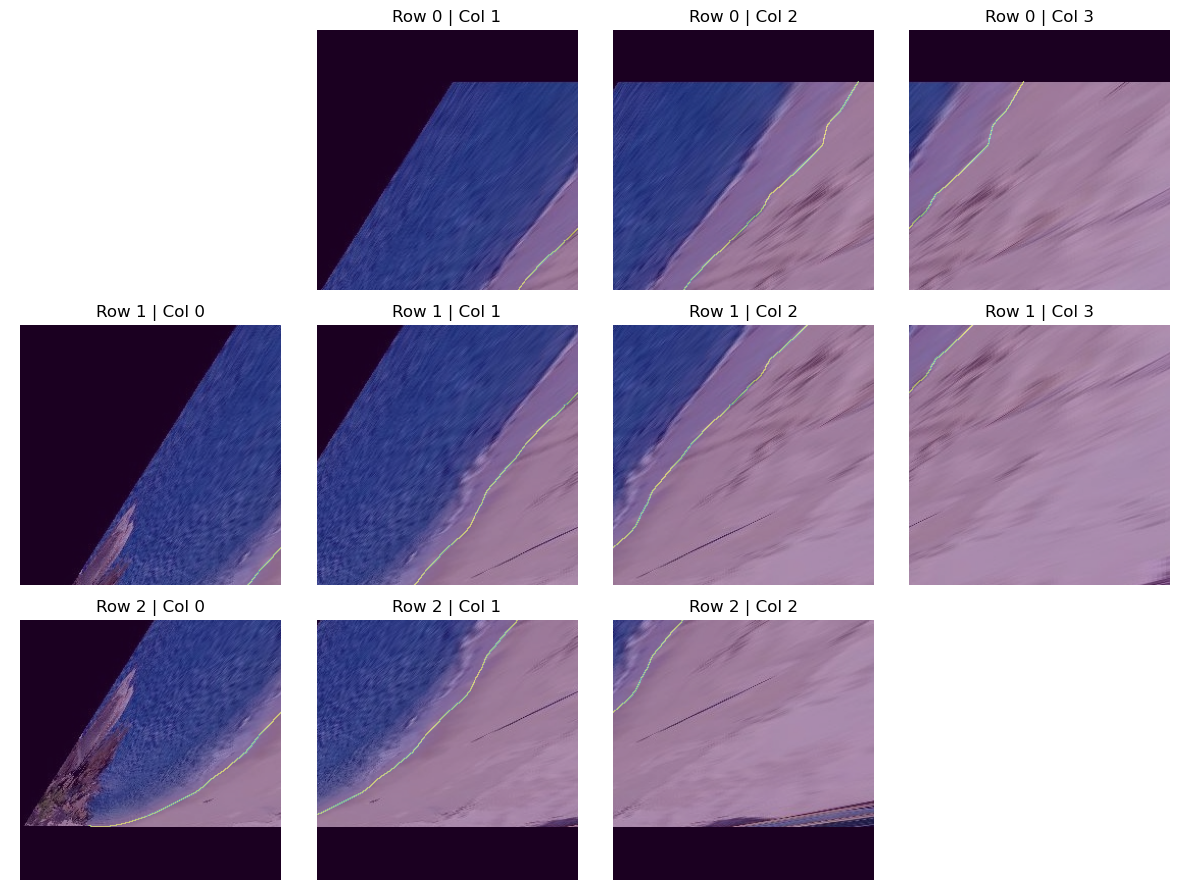

In [ ]:
patchify = Patchify(patch_size=256, stride=128)

result = patchify.extract_patches(image_path, mask_path, skip_background=False, skip_no_shoreline=True)
patches = result['patches']

print("Number of patches:", len(patches))
rows = max(patch['row'] for patch in patches)
cols = max(patch['col'] for patch in patches)
print("Rows:", rows)

# Create subplots
fig, axes = plt.subplots(rows + 1, cols + 1, figsize=(3*(cols + 1), 3 * (rows + 1)))
axes = axes.flatten()

# Show each patch
for i, patch in enumerate(patches):
    ax = axes[patch['row'] * (cols + 1) + patch['col']]
    patch['image'] = cv2.cvtColor(patch['image'], cv2.COLOR_BGR2RGB)
    ax.imshow(patch['image'])
    ax.imshow(patch['mask'], alpha=0.4)
    ax.set_title(f"Row {patch['row']} | Col {patch['col']}")
    ax.axis('off')

# Hide unused subplots
for i in range(0, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Number of patches: 26
Rows: 6


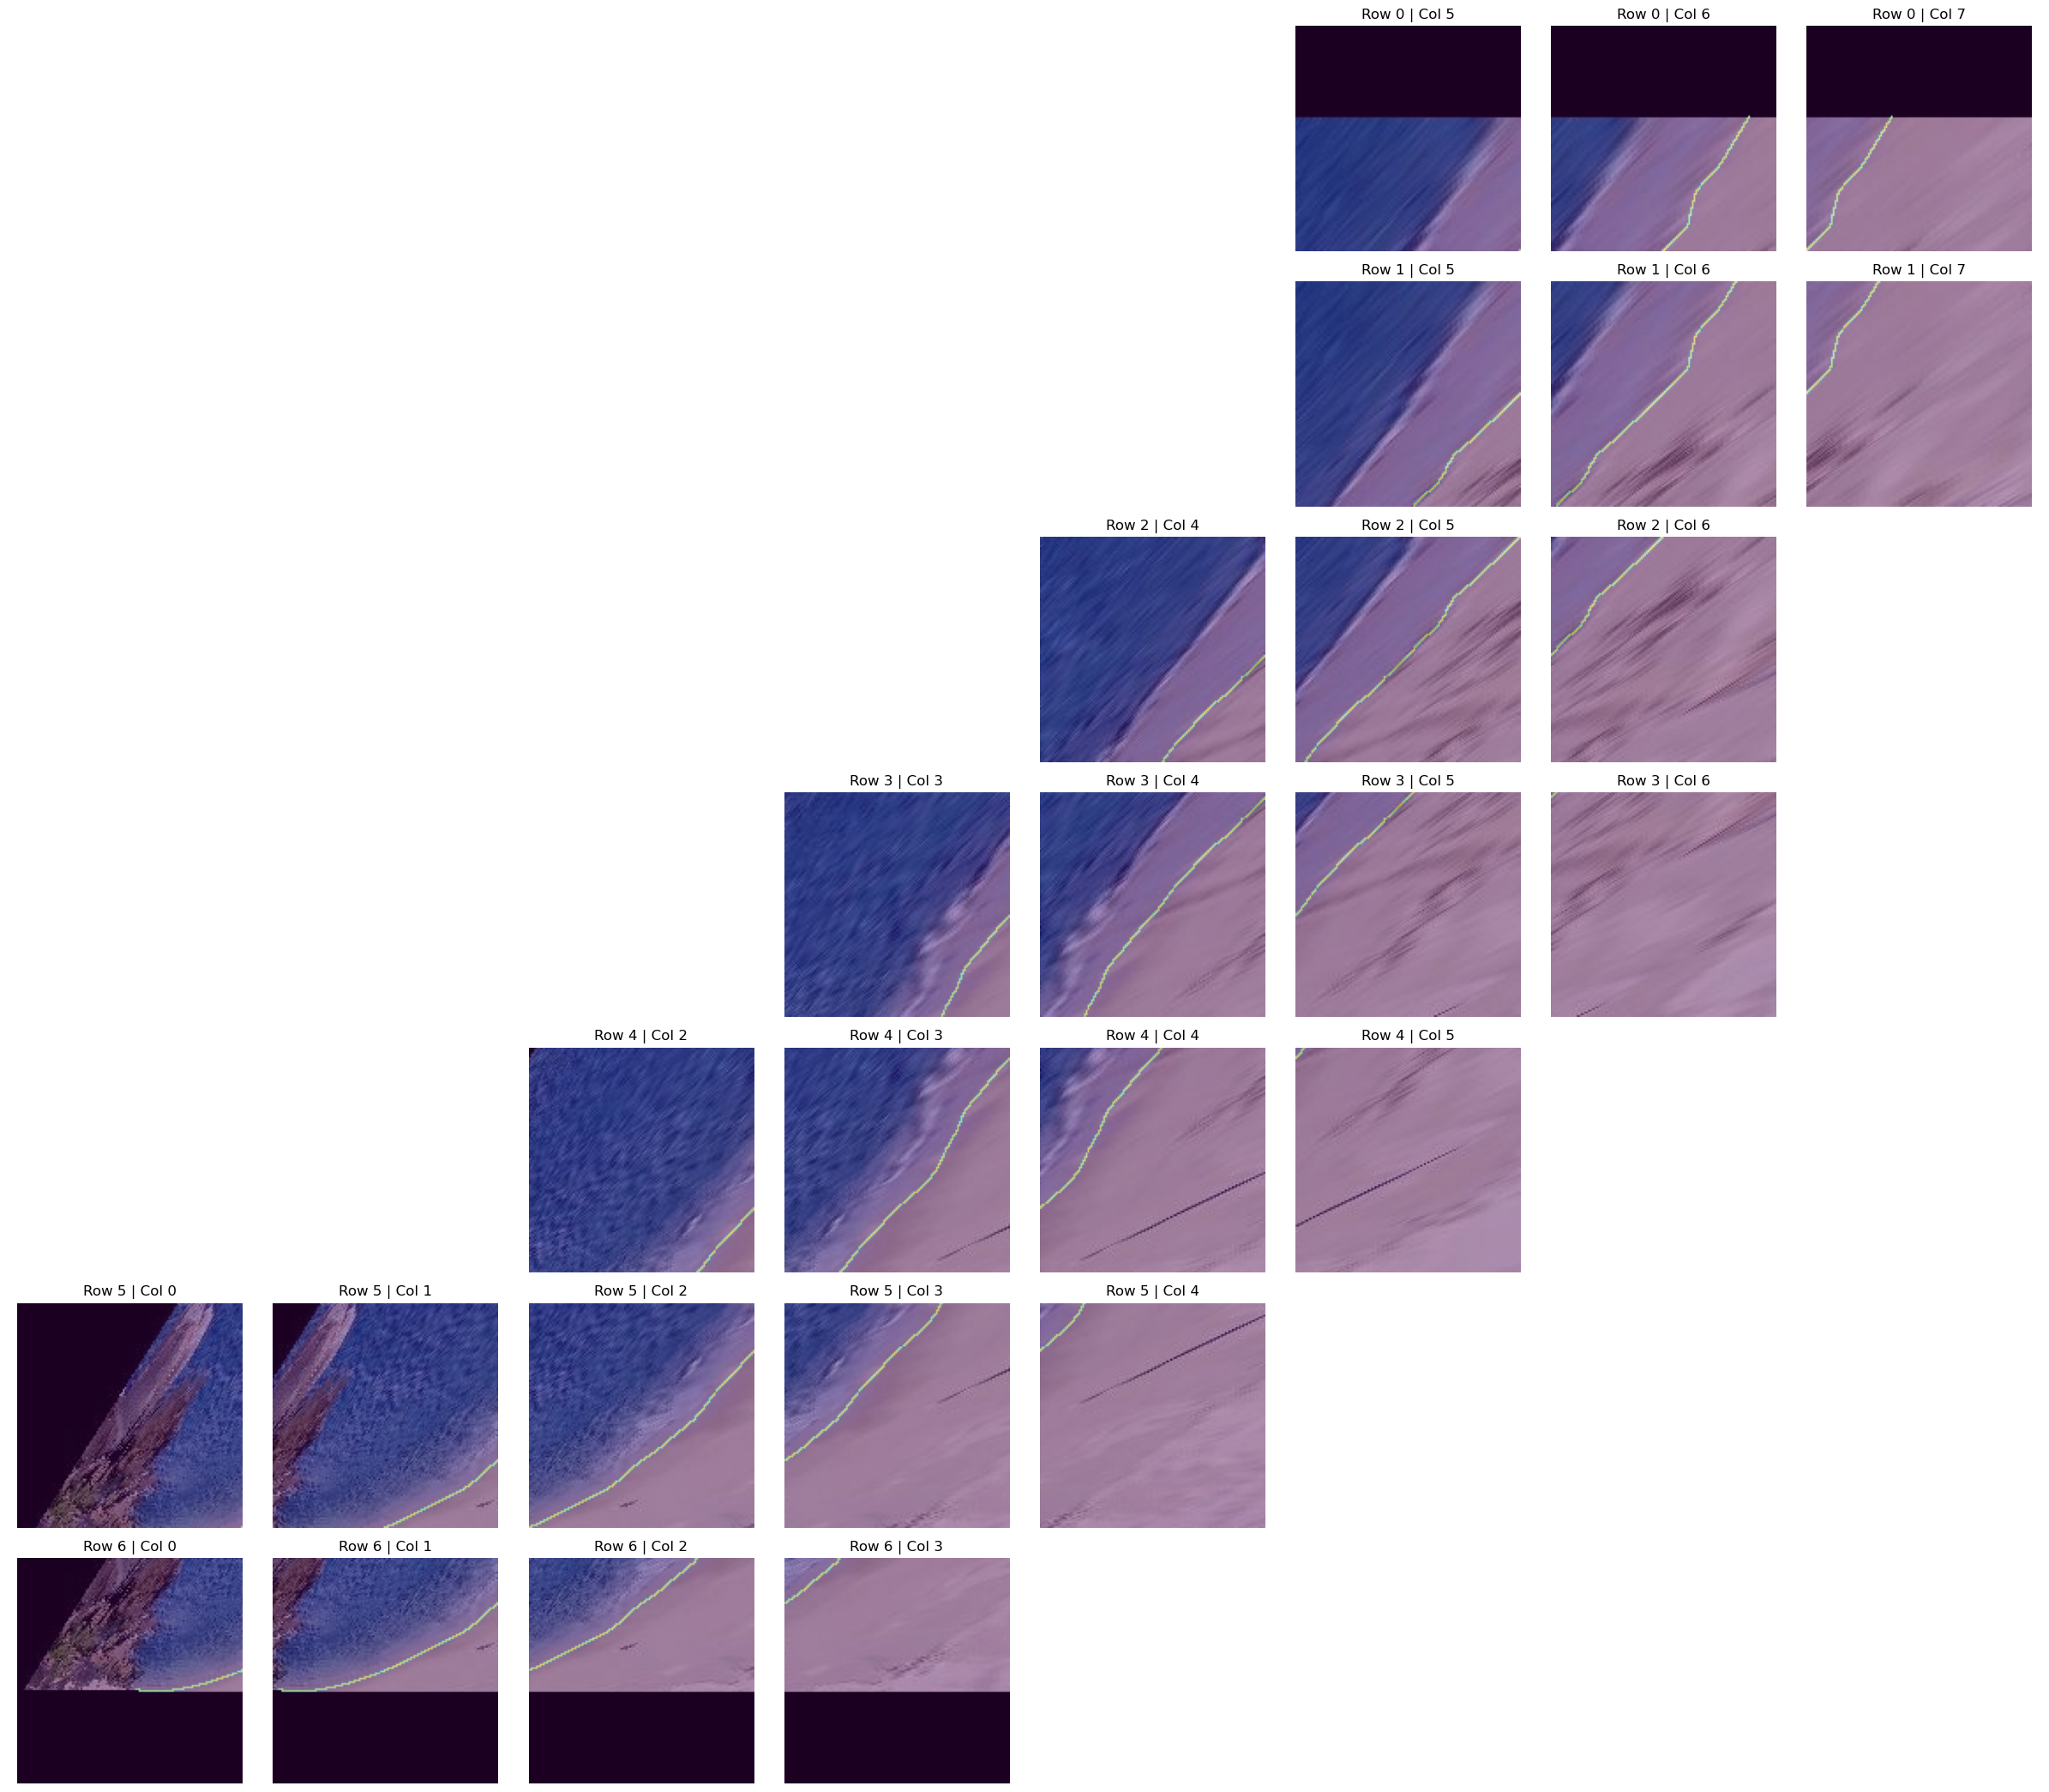

In [ ]:
patchify = Patchify(patch_size=128, stride=64)

result = patchify.extract_patches(image_path, mask_path, skip_background=False, skip_no_shoreline=True)
patches = result['patches']

print("Number of patches:", len(patches))
rows = max(patch['row'] for patch in patches)
cols = max(patch['col'] for patch in patches)
print("Rows:", rows)

# Create subplots
fig, axes = plt.subplots(rows + 1, cols + 1, figsize=(3*(cols + 1), 3 * (rows + 1)))
axes = axes.flatten()

# Show each patch
for i, patch in enumerate(patches):
    ax = axes[patch['row'] * (cols + 1) + patch['col']]
    patch['image'] = cv2.cvtColor(patch['image'], cv2.COLOR_BGR2RGB)
    ax.imshow(patch['image'])
    ax.imshow(patch['mask'], alpha=0.4)
    ax.set_title(f"Row {patch['row']} | Col {patch['col']}")
    ax.axis('off')

# Hide unused subplots
for i in range(0, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
patchify = Patchify(patch_size=256, stride=128)
extract_patches_and_save = patchify.extract_patches_and_save(filtered_data, output_dir='../../data/patchify_shoreline/', skip_no_shoreline='1')

Extracting patches for train dataset...
Finished extracting patches for train dataset.

Extracting patches for validation dataset...
Finished extracting patches for validation dataset.

Extracting patches for test dataset...
Finished extracting patches for test dataset.



In [ ]:
patchify = Patchify(patch_size=128, stride=64)
extract_patches_and_save = patchify.extract_patches_and_save(filtered_data, output_dir='../../data/patchify_128_shoreline/', skip_no_shoreline='1')

# 4 Classes

In [6]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_4_classes/"))

# Load the data, all the different stations
data = CoastData(data_path)

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image_path = filtered_data['train']['images'][0]
mask_path = filtered_data['train']['masks'][0]

print("Path:", image_path)
print("Mask:", mask_path)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
print(np.unique(mask))

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Path: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_4_classes/images/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.image.jpg
Mask: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_4_classes/masks/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.mask.png
[0 1 2 3]


Number of patches: 14
Rows: 2


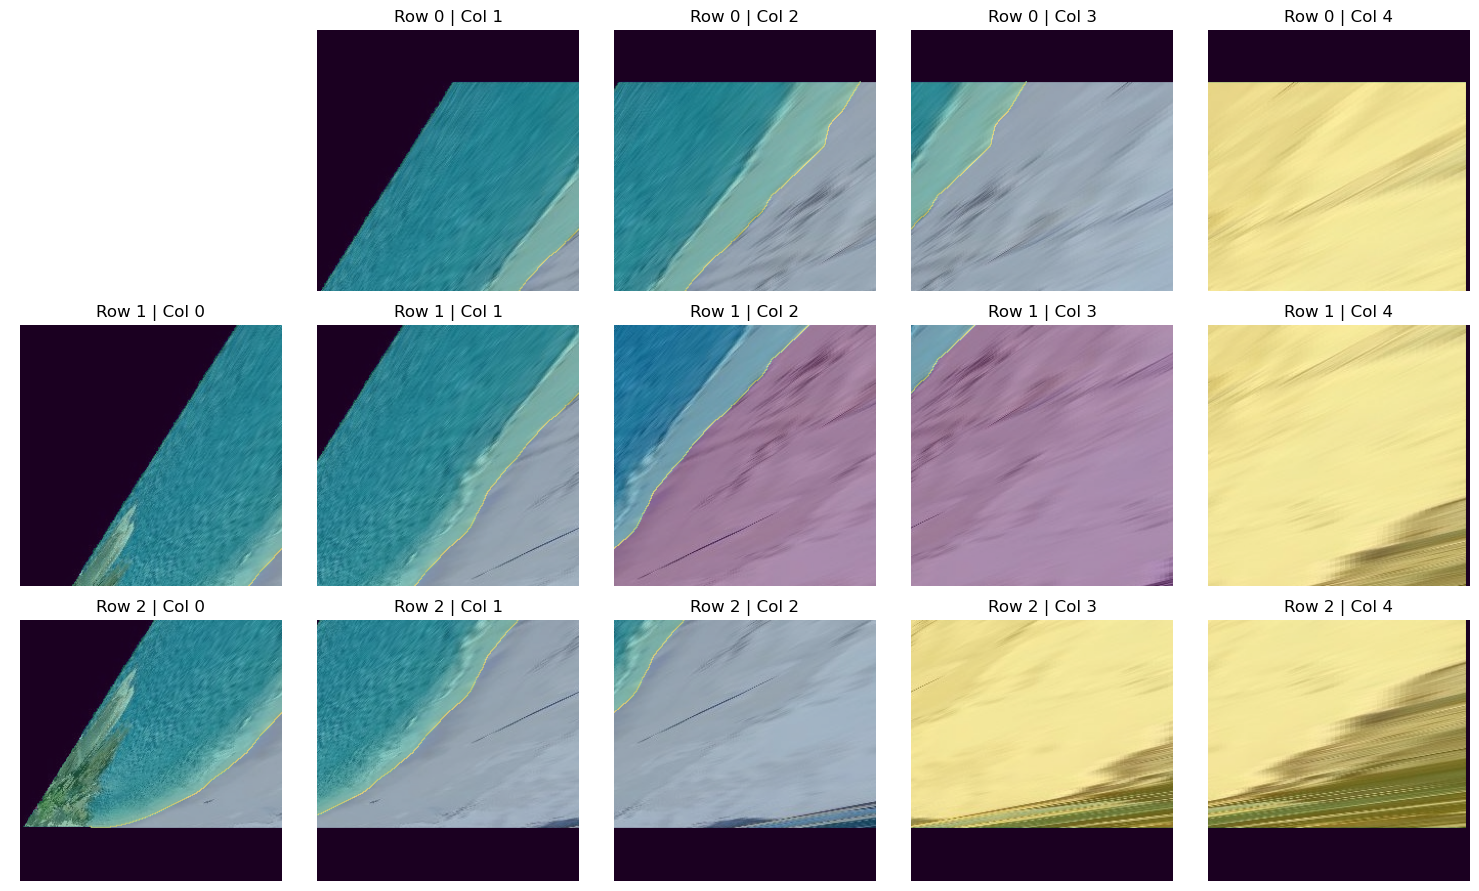

In [ ]:
patchify = Patchify(patch_size=256, stride=128)

result = patchify.extract_patches(image_path, mask_path, skip_background=False, skip_no_shoreline=True)
patches = result['patches']

print("Number of patches:", len(patches))
rows = max(patch['row'] for patch in patches)
cols = max(patch['col'] for patch in patches)
print("Rows:", rows)

# Create subplots
fig, axes = plt.subplots(rows + 1, cols + 1, figsize=(3*(cols + 1), 3 * (rows + 1)))
axes = axes.flatten()

# Show each patch
for i, patch in enumerate(patches):
    ax = axes[patch['row'] * (cols + 1) + patch['col']]
    patch['image'] = cv2.cvtColor(patch['image'], cv2.COLOR_BGR2RGB)
    ax.imshow(patch['image'])
    ax.imshow(patch['mask'], alpha=0.4)
    ax.set_title(f"Row {patch['row']} | Col {patch['col']}")
    ax.axis('off')

# Hide unused subplots
for i in range(0, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
patchify = Patchify(patch_size=256, stride=128)

# Here the shoreline index is 3
extract_patches_and_save = patchify.extract_patches_and_save(filtered_data, output_dir='../../data/patchify_4_classes/', skip_no_shoreline='3')

Extracting patches for train dataset...
Finished extracting patches for train dataset.

Extracting patches for validation dataset...
Finished extracting patches for validation dataset.

Extracting patches for test dataset...
Finished extracting patches for test dataset.



# 352x253

In [3]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed/"))

# Load the data, all the different stations
data = CoastData(data_path)

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image_path = filtered_data['train']['images'][0]
mask_path = filtered_data['train']['masks'][0]

print("Path:", image_path)
print("Mask:", mask_path)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
print(np.unique(mask))

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Path: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed/images/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.image.jpg
Mask: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed/masks/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.mask.png
[0 1 2]


Number of patches: 14
Rows: 2


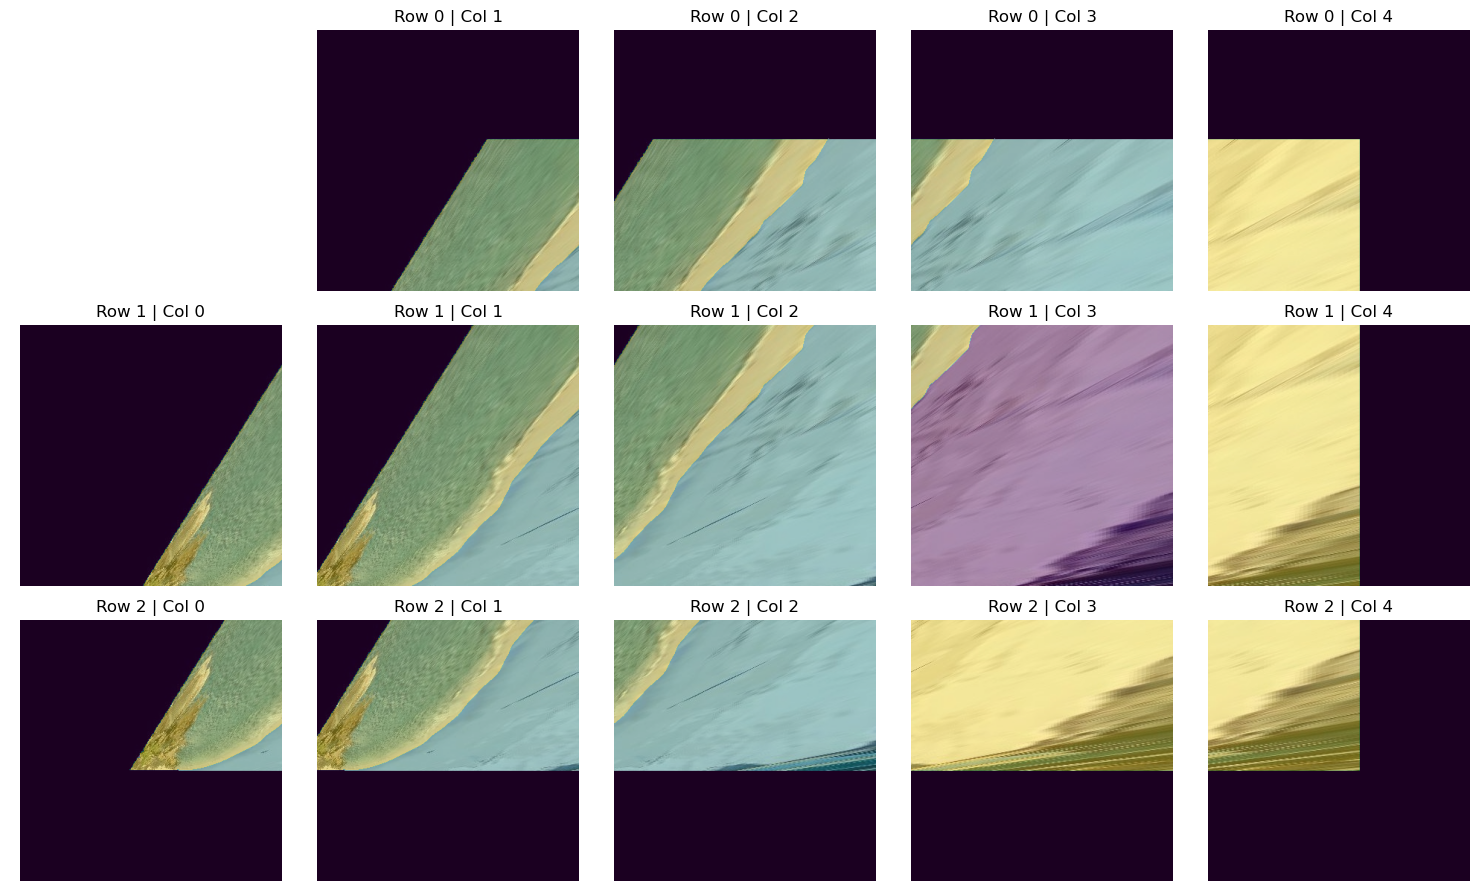

In [9]:
patchify = Patchify(patch_size=352, stride=352//2)

result = patchify.extract_patches(image_path, mask_path, skip_background=False, skip_no_shoreline=True)
patches = result['patches']

print("Number of patches:", len(patches))
rows = max(patch['row'] for patch in patches)
cols = max(patch['col'] for patch in patches)
print("Rows:", rows)

# Create subplots
fig, axes = plt.subplots(rows + 1, cols + 1, figsize=(3*(cols + 1), 3 * (rows + 1)))
axes = axes.flatten()

# Show each patch
for i, patch in enumerate(patches):
    ax = axes[patch['row'] * (cols + 1) + patch['col']]
    patch['image'] = cv2.cvtColor(patch['image'], cv2.COLOR_BGR2RGB)
    ax.imshow(patch['image'])
    ax.imshow(patch['mask'], alpha=0.4)
    ax.set_title(f"Row {patch['row']} | Col {patch['col']}")
    ax.axis('off')

# Hide unused subplots
for i in range(0, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
patchify = Patchify(patch_size=352, stride=352//2)

# Here the shoreline index is 3
extract_patches_and_save = patchify.extract_patches_and_save(filtered_data, output_dir='../../data/patchify_352x352/', skip_no_shoreline='3')

Extracting patches for train dataset...
Finished extracting patches for train dataset.

Extracting patches for validation dataset...
Finished extracting patches for validation dataset.

Extracting patches for test dataset...
Finished extracting patches for test dataset.

